矩阵分解

在协同过滤基础上加入隐向量的概念,加强了模型处理稀疏矩阵的能力,针对性地解决了协同过滤存在的主要问题。

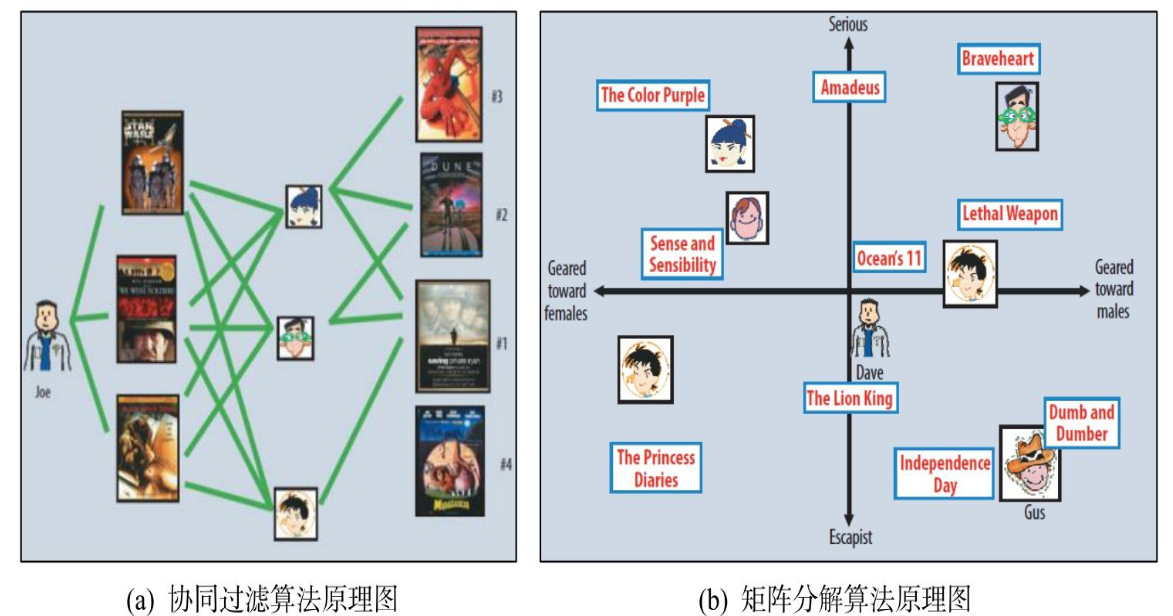 

矩阵分解算法期望为每一个用户和视频生成一个隐向量,将用户和视频定位到隐向量的表示空间上,距离相近的用户和视频表明兴趣特点接近,在推荐过程中,就应该把距离相近的视频推荐给目标用户。

在“矩阵分解”的算法框架下,用户和物品的隐向量是通过分解协同过滤生成的共现矩阵得到的。
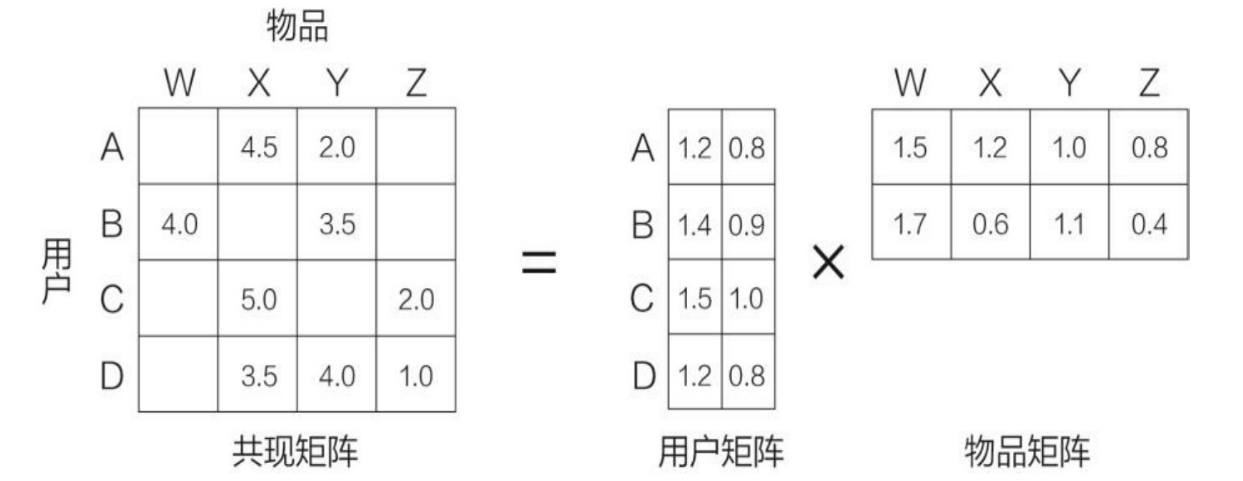

矩阵分解算法将m×n维的共现矩阵R分解为m×k维的用户矩阵U和k×n维的物品矩阵V相乘的形式。其中m是用户数量,n是物品数量,k是隐 向量的维度。k的大小决定了隐向量表达能力的强弱。k的取值越小, 隐向量包含的信息越少,模型的泛化程度越高;反之,k的取值越大, 隐向量的表达能力越强,但泛化程度相应降低。

k的取值还与矩阵分解复杂度相关，需考虑推荐效果和工程开销的平衡！

基于用户矩阵 U和物品矩阵 V,用户u对物品i的预估评分如下：
$$ \hat{r}_{ui} = q_i^Tp_u$$

其中$p_u$是用户u在用户矩阵$U$中对应的行向量， $q_i$是物品i在物品矩阵$V$中的列项量

矩阵分解求解过程
- 奇异值分解 （SVD）
- 梯度下降（Gradient Descent）

SVD不适宜作为互联网场景下的矩阵分解方法：
- 奇异值分解要求原始共现矩阵是稠密的
- 奇异值分解计算复杂度高

梯度下降：更新参数为以用户矩阵和物品矩阵

损失函数： MSE + 正则化项 （L2正则化项）以防止过拟合

`消除用户和物品的打分偏差`：加入用户和物品的偏差

$$ \hat{r}_{ui} = \mu + b_i + b_1 + q_i^Tp_u $$

其中μ是全局偏差常数, $b_i$是物品偏差系数,可使用物品i收到的所有评分的均值, $b_i$是用户偏差系数,可使用用户u给出的所有评分的均值。

同时在损失函数的正则化项中加入$b_u$、$b_i$

矩阵分解的优点和局限性
- 泛化能力强，解决数据稀疏问题
- 空间复杂度低
- 扩展性：矩阵分解产出的用户矩阵和物品矩阵（隐向量）类似于Embedding思想，便于结合DL模型
- 但仍旧无法加入用户、物品的上下文信息

下文的逻辑回归一定程度上缓解此问题
